### Задание 5.
Линейное программирование. Графический метод [1,2 – гл. 3, 4]
Решить задачу линейного программирования, используя геометрическую интерпретацию.
Проверить результаты вычислений на компьютере

In [1]:
import sympy as sym
from pulp import LpProblem, LpMaximize, LpVariable, LpStatus
%matplotlib inline

In [2]:

class LP:
    def __init__(self, a, b, c, D, F):
        self.a = a
        self.b = b
        self.c = c
        self.s_F = F

        self.F = sym.parse_expr(F).subs(dict(a=a, b=b, c=c))
        self.D = list(map(lambda x: sym.parse_expr(x).subs(dict(a=a, b=b, c=c)), D))

        self.x_coord = (-20, 20)
        self.y_coord = (-20, 20)


        self.model = self._create_model()


    def _create_model(self):
        model = LpProblem(name="resource-allocation", sense = LpMaximize)
        x1 = LpVariable(name="x_1")
        x2 = LpVariable(name="x_2")
        model += sym.lambdify(['x_1', 'x_2'], self.F)(x1, x2)

        d_names = ['A', 'B', 'C', 'D']
        it = iter(d_names)

        for d in self.D:
            f = lambda x_1, x_2: eval(str(d))
            model += (f(x1, x2), next(it))

        model.solve()

        return model



    def __repr__(self):
        status = self.model.status
        x1_total = self.model.variables()[0].value()
        x2_total = self.model.variables()[1].value()
        F = self.model.objective.value()

        self.show_graphic()

        return f'Статус решения: {status}, {LpStatus[status]}\n' \
               f'Оптимальное значение целевой функции: {int(F)}\n' \
               f'Оптимальный план: (x1 = {int(x1_total)}, x2 = {int(x2_total)})'




    def show_graphic(self):
        colors = ['r', '#F2E62E', 'b', '#18C95E']
        d_names = ['A', 'B', 'C', 'D']

        x1_total = self.model.variables()[0].value()
        x2_total = self.model.variables()[1].value()

        p = sym.plot_implicit(sym.And(*self.D),
                              ('x_1', *self.x_coord),
                              ('x_2', *self.y_coord),
                              line_color="#2BE68F",
                              show=False,
                              markers=[{'args': [x1_total, x2_total, 'go'], 'color':'#0AFFF4'}]
                              )

        for i in range(len(colors)):
            p.append(sym.plot_implicit(
                sym.Eq(*self.D[i].args),
                ('x_1', *self.x_coord),
                ('x_2', *self.y_coord),
                line_color=colors[i],
                adaptive=False,
                show=False)[0])




        print(sym.Eq(self.F, self.model.objective.value()))

        p.append(sym.plot_implicit(sym.Eq(self.F, self.model.objective.value()),
                                   ('x_1', *self.x_coord),
                                   ('x_2', *self.y_coord),
                                   line_color='black', adaptive=False, show=False)[0])

        p.append(sym.plot_implicit(sym.Eq(self.F, 2),
                                   ('x_1', *self.x_coord),
                                   ('x_2', *self.y_coord),
                                   line_color='#808080', adaptive=False, show=False)[0])


        p.annotations = []
        o = 20



        for i in range(len(d_names)):
            p.annotations.append(
                {'xy': (15, o), 'text': d_names[i], 'ha': 'left', 'va': 'top', 'color': colors[i]}
            )
            o -= 2

        p.annotations.append(
            {'xy': (15, o), 'text': f'F={self.model.objective.value()}', 'ha': 'left', 'va': 'top', 'color': 'black'}
        )

        p.annotations.append(
            {'xy': (15, o - 2), 'text': 'F=2', 'ha': 'left', 'va': 'top', 'color': '#808080'}
        )

        p.annotations.append(
            {'xy': (x1_total + 2, x2_total), 'text': f'M*({int(x1_total)}, {int(x2_total)})', 'ha': 'left', 'va': 'top', 'color': '#0AFFF4'}
        )


        f_opt = 'x_1 +' + str(-1/self.a) + '*x_2'
        opt_l = sym.plot_implicit(sym.Eq(sym.parse_expr(f_opt), x1_total + -1/self.a * x2_total),
                           ('x_1', *self.x_coord),
                           ('x_2', *self.y_coord),
                           line_color='#0AFFF4', adaptive=False, show=False)

        p.annotations.append(
                {'xy': (15, o - 4), 'text': 'solution arrow', 'ha': 'left', 'va': 'top', 'color': '#0AFFF4'})

        p.append(opt_l[0])

        p.show()


In [3]:
a = 4
b = 8
c= 3/4

F = 'x_1 + a * x_2'

D = ['x_1 + 2 * x_2 <= 10',
      '3 * x_1 + 2 * x_2 <= 18',
      'x_1 - x_2 >= -b',
      'c * x_1 - x_2 <= 8 *c + 3']

lp = LP(a, b, c, D, F)

Eq(x_1 + 4*x_2, 22.0)


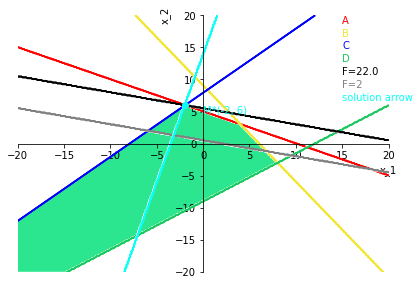

Статус решения: 1, Optimal
Оптимальное значение целевой функции: 22
Оптимальный план: (x1 = -2, x2 = 6)

In [4]:
lp